In [ ]:
## Bitcoin Price Prediction

In [39]:
import numpy as np
import pandas as pd

df = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'],)
df=df.iloc[::-1]
df.index = df['Date']
del df['Date']
df.info()
df = df[['Close']]
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1655 entries, 2013-04-28 to 2017-11-07
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1655 non-null   float64
 1   High        1655 non-null   float64
 2   Low         1655 non-null   float64
 3   Close       1655 non-null   float64
 4   Volume      1655 non-null   object 
 5   Market Cap  1655 non-null   object 
dtypes: float64(4), object(2)
memory usage: 90.5+ KB
              Close
Date               
2017-11-03  7207.76
2017-11-04  7379.95
2017-11-05  7407.41
2017-11-06  7022.76
2017-11-07  7144.38


In [14]:
df.head()

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21


In [28]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
df = df[['Close']]

forecast_out = int(30)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

LR = LinearRegression()
LR.fit(X_train,y_train)

cross_validation = LR.predict(X_test)

confidence = LR.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = LR.predict(X_forecast)
print(forecast_prediction)

confidence:  0.9033287709354711
[5717.41343498 5729.45803845 5783.20572234 6532.73765125 6774.7169968
 6997.70525243 6812.14345774 6869.40666782 6724.33986895 6706.43605516
 6848.78466368 7214.74973182 7239.09263653 7211.08923548 7116.73782815
 6629.05823648 6899.86248061 7085.94375168 6936.22582709 6902.62899434
 7386.78097898 7358.60844609 7766.78399018 8127.89255822 8503.83640516
 8659.99342067 8868.01350809 8901.18751123 8436.49776951 8583.42501867]


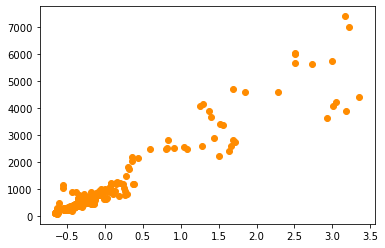

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color ='darkorange', label= 'data')
plt.show()

In [30]:
df.corr()

,Close,Prediction
Close,1.000000,0.949252
Prediction,0.949252,1.000000


<AxesSubplot:>

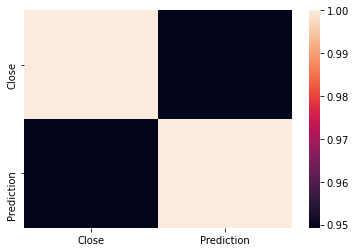

In [31]:
import seaborn as sns
sns.heatmap(df.corr())

In [34]:
LR.score(X_test,y_test)

0.9033287709354711

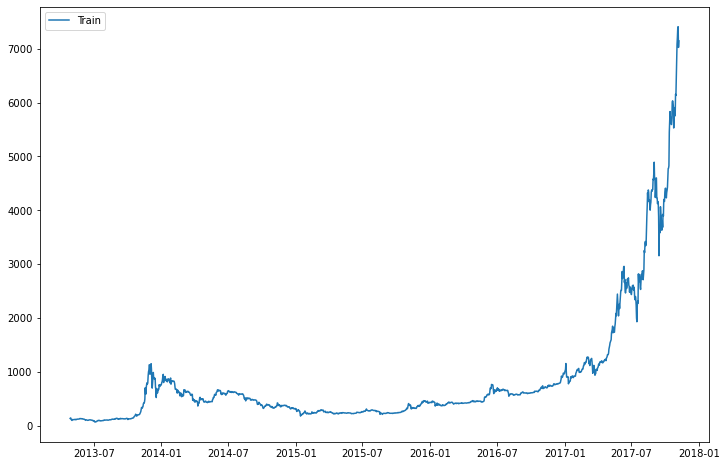

In [35]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'],label='Train')
plt.legend(loc='best')
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test,cross_validation))
print(rms)

369.86636003121595
